# `matplotlib ax.fill_between()` 

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Data

In [2]:
df = pd.read_csv(
    f"../data/icco_org_daily_cocoa_prices.csv",
    parse_dates=["date"],
    dayfirst=True,
    index_col=["date"],
    usecols=[0, 1],
    nrows=261,
    names=["date", "price_GBP"],
    header=0,
    thousands=","
)


In [3]:
df.head()

,price_GBP
date,
2023-05-15,2231.67
2023-05-12,2238.00
2023-05-11,2235.33
2023-05-10,2234.33
2023-05-09,2221.00


In [4]:
df.tail()

,price_GBP
date,
2022-05-17,1800.67
2022-05-16,1818.00
2022-05-13,1800.67
2022-05-12,1787.67
2022-05-11,1808.00


In [5]:
# The data is at daily interval so calculate weekly mean from it
grouped = df.groupby(pd.Grouper(freq="1W")).agg({np.mean, np.std})

In [6]:
grouped.dropna(inplace=True)

In [7]:
grouped.head()

price_GBP           
                mean        std
date                           
2022-05-15  1798.780  10.295936
2022-05-22  1786.534  26.361055
2022-05-29  1749.266   9.153045
2022-06-05  1785.866  11.190785
2022-06-12  1774.932   5.827836

## Plot 1: fill between line and 0

In [8]:
# Settings
gnome_blue_1 = "#99c1f1"
gnome_blue_5 = "#1a5fb4"

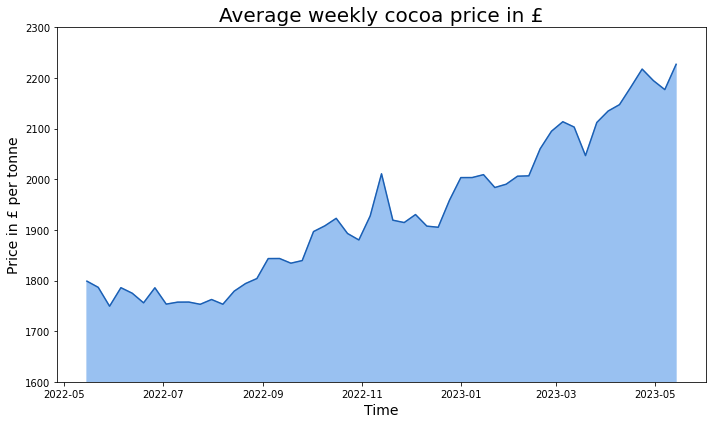

In [9]:
fig, ax = plt.subplots(
    figsize=(10,6),
    facecolor="white"
)
ax.set_title(
    "Average weekly cocoa price in £",
    fontsize=20,
)
ax.plot(
    grouped["price_GBP"]["mean"],
    color=gnome_blue_5
)
ax.fill_between(
    x=grouped.index,
    y1=grouped["price_GBP"]["mean"],
    color=gnome_blue_1
)

# Set axis labels
ax.set_xlabel(
    "Time",
    fontsize=14
)
ax.set_ylabel(
    "Price in £ per tonne",
    fontsize=14
)

# Set axis limits
ax.set_ylim(1600, 2300)

plt.tight_layout()

plt.savefig(
    fname="plot 1.png",
    format="png",
    dpi=125
);

## Plot 2: fill between two lines

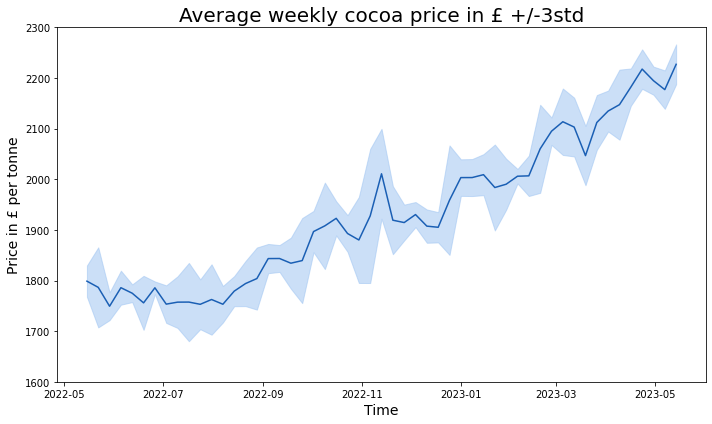

In [10]:
fig, ax = plt.subplots(
    figsize=(10,6),
    facecolor="white"
)
ax.set_title(
    "Average weekly cocoa price in £ +/-3std",
    fontsize=20,
)
ax.plot(
    grouped["price_GBP"]["mean"],
    color=gnome_blue_5
)
ax.fill_between(
    x=grouped.index,
    y1=grouped["price_GBP"]["mean"]+3*grouped["price_GBP"]["std"],
    y2=grouped["price_GBP"]["mean"]-3*grouped["price_GBP"]["std"],
    color=gnome_blue_1,
    alpha=0.5
)

# Set axis labels
ax.set_xlabel(
    "Time",
    fontsize=14
)
ax.set_ylabel(
    "Price in £ per tonne",
    fontsize=14
)

# Set axis limits
ax.set_ylim(1600, 2300)

plt.tight_layout()

plt.savefig(
    fname="plot 2.png",
    format="png",
    dpi=125
);

## Plot 3: fill between two lines with `where` and `interpolate` parameters

William Playfair's *Exports and Imports to and from DENMARK & NORWAY from 1700 to 1780*

Source of data: [excelcharts.com](https://excelcharts.com/excel-charts-meet-william-playfair/)

### New data

In [11]:
df = pd.read_csv(
    f"../data/william_playfair_import_export.csv",
    parse_dates=["date"],
    index_col=["date"]
)


In [12]:
df.head()

,imports,exports
date,,
1700-01-01,70.2,32.3
1702-01-01,72.7,36.8
1704-01-01,73.8,39.2
1706-01-01,75.7,42.5
1708-01-01,78.6,50.3


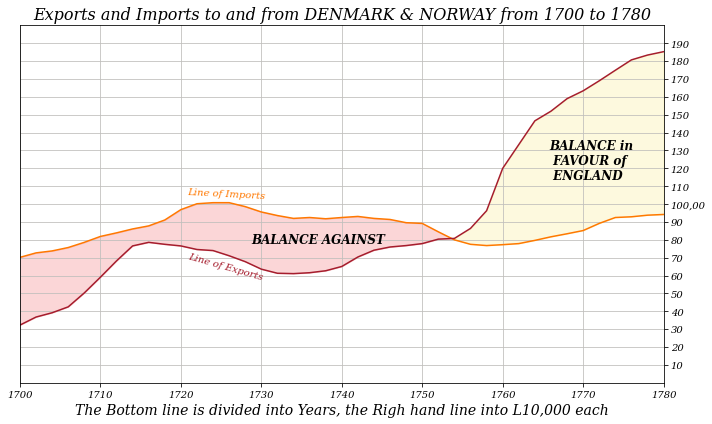

In [13]:
# Update plot parameters
from matplotlib import rcParams

rcParams['font.family'] = "serif"
rcParams['font.style'] = "oblique"

# Specify more colours
color_gnome_orange_3 = "#ff7800"
color_gnome_red_5 = "#a51d2d"

fig, ax = plt.subplots(
    figsize=(10,6),
    facecolor="white"
)
ax.set_title(
    "Exports and Imports to and from DENMARK & NORWAY from 1700 to 1780",
    fontsize=16
)
ax.plot(
    df["imports"],
    color=color_gnome_orange_3
)
ax.plot(
    df["exports"],
    color=color_gnome_red_5
)
ax.fill_between(
    x=df.index,
    y1=df["imports"],
    y2=df["exports"],
    where=df["imports"]>df["exports"],
    color="#ed333b",  # GNOME red 2
    alpha=0.2,
    interpolate=True
)
ax.fill_between(
    x=df.index,
    y1=df["imports"],
    y2=df["exports"],
    where=df["imports"]<df["exports"],
    color="#f8e45c",  # GNOME yellow 2
    alpha=0.2,
    interpolate=True
)

# Set axis labels
ax.set_xlabel(
    "The Bottom line is divided into Years, the Righ hand line into L10,000 each",
    fontsize=14
)

# Set axis limits
ax.set_ylim(0, 200)
ax.set_xlim(
    pd.Timestamp(
        year=1700,
        month=1,
        day=1
        ),
    pd.Timestamp(
        year=1780,
        month=1,
        day=1
        )
)

# Set "y" tick marks
ax.set_yticks(list(range(0, 210, 10)[1:-1]))
ax.set_yticklabels([f"100,00" if y==100 else f"{y}" for y in range(0, 210, 10)[1:-1]])

# Move "y" axis labels and ticks to the right
ax.yaxis.tick_right()

# Add grid lines
ax.grid(
    color="#c0bfbc"  # GNOME light 4
)

# Annotations
ax.text(
    x=pd.Timestamp(
        year=1720,
        month=10,
        day=1
    ),
    y=103,
    s="Line of Imports",
    color=color_gnome_orange_3,
    rotation=-3
)
ax.text(
    x=pd.Timestamp(
        year=1720,
        month=10,
        day=1
    ),
    y=58,
    s="Line of Exports",
    color=color_gnome_red_5,
    rotation=-16
)
ax.text(
    x=pd.Timestamp(
        year=1728,
        month=10,
        day=1
    ),
    y=78,
    s="BALANCE AGAINST",
    color="black",
    fontsize=12,
    weight="bold"
)
ax.text(
    x=pd.Timestamp(
        year=1765,
        month=10,
        day=1
    ),
    y=114,
    s=f"BALANCE in\n FAVOUR of\n ENGLAND",
    color="black",
    fontsize=12,
    weight="bold"
)

plt.tight_layout()

plt.savefig(
    fname="plot 3.png",
    format="png",
    dpi=125
);

## Plot 4: fill between two lines with `where` but WITHOUT `interpolate` parameter


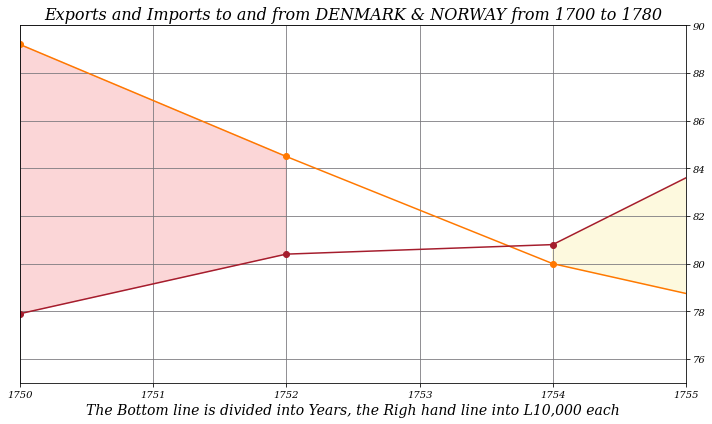

In [14]:
fig, ax = plt.subplots(
    figsize=(10,6),
    facecolor="white"
)
ax.set_title(
    "Exports and Imports to and from DENMARK & NORWAY from 1700 to 1780",
    fontsize=16
)
ax.plot(
    df["imports"],
    color=color_gnome_orange_3,
    marker="o"
)
ax.plot(
    df["exports"],
    color=color_gnome_red_5,
    marker="o"
)
ax.fill_between(
    x=df.index,
    y1=df["imports"],
    y2=df["exports"],
    where=df["imports"]>df["exports"],
    color="#ed333b",  # GNOME red 2
    alpha=0.2
)
ax.fill_between(
    x=df.index,
    y1=df["imports"],
    y2=df["exports"],
    where=df["imports"]<df["exports"],
    color="#f8e45c",  # GNOME yellow 2
    alpha=0.2
)

# Set axis labels
ax.set_xlabel(
    "The Bottom line is divided into Years, the Righ hand line into L10,000 each",
    fontsize=14
)

# Set axis limits
ax.set_ylim(75, 90)
ax.set_xlim(
    pd.Timestamp(
        year=1750,
        month=1,
        day=1
        ),
    pd.Timestamp(
        year=1755,
        month=1,
        day=1
        )
)

# Move "y" axis labels and ticks to the right
ax.yaxis.tick_right()

# Add grid lines
ax.grid(
    color="#77767b"  # GNOME dark 1
)

plt.tight_layout()

plt.savefig(
    fname="plot 4.png",
    format="png",
    dpi=125
);